# Assignment 1 - Building a Vision Model with Keras

In this assignment, you will build a simple vision model using Keras. The goal is to classify images from the Fashion MNIST dataset, which contains images of clothing items.

You will:
1. Load and inspect the Fashion MNIST dataset.
2. Run a simple baseline model to establish a performance benchmark.
3. Build and evaluate a simple CNN model, choosing appropriate loss and metrics.
4. Design and run controlled experiments on one hyperparameter (e.g., number of filters, kernel size, etc.) and one regularization technique (e.g., dropout, L2 regularization).
5. Analyze the results and visualize the model's performance.

# 1. Loading and Inspecting the Dataset

Fashion MNIST is a dataset of grayscale images of clothing items, with 10 classes. Each image is 28x28 pixels, like the MNIST dataset of handwritten digits. Keras provides a convenient way to load this dataset. 

In this section, you should:

- [ ] Inspect the shapes of the training and test sets to confirm their size and structure.
- [ ] Convert the labels to one-hot encoded format if necessary. (There is a utility function in Keras for this.)
- [ ] Visualize a few images from the dataset to understand what the data looks like.

In [2]:
from keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalize the pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Classes in the Fashion MNIST dataset
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [3]:
# Inspect the shapes of the datasets
print(f'X_train shape: {X_train.data.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

# Convert labels to one-hot encoding
from keras.utils import to_categorical

print(f'Before one-hot encoding: {y_train[0]}')
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
print(f'After one-hot encoding: {y_train[0]}')


X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)
Before one-hot encoding: 9
After one-hot encoding: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


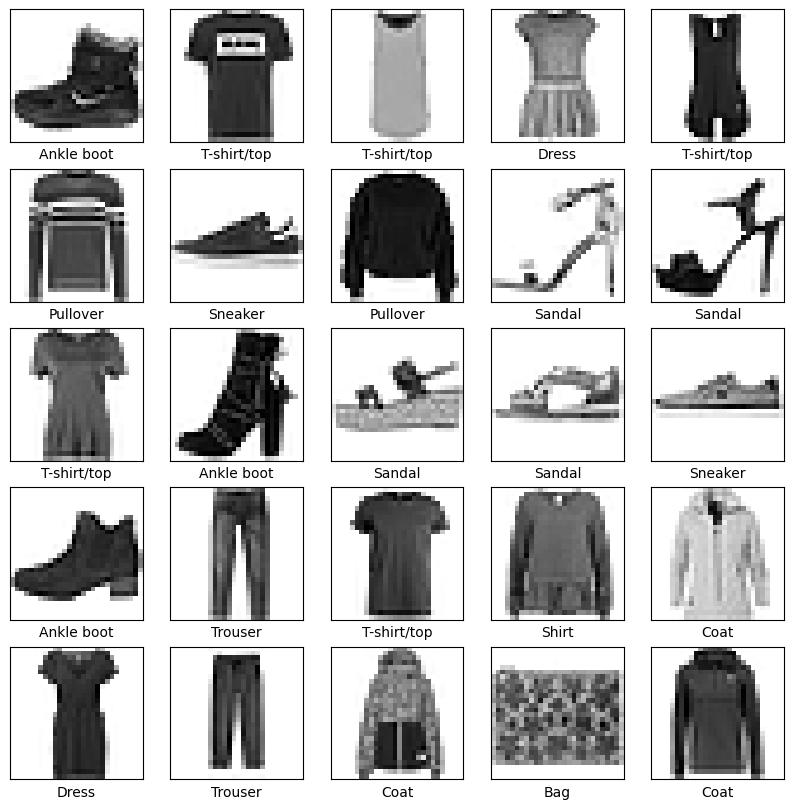

In [4]:
import matplotlib.pyplot as plt
# Visualize some samples from the training set
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i].argmax()])
plt.show()

Reflection: Does the data look as expected? How is the quality of the images? Are there any issues with the dataset that you notice?

**Your answer here**
The images look as expected but the quality of these images are very low. 

# 2. Baseline Model

In this section, you will create a linear regression model as a baseline. This model will not use any convolutional layers, but it will help you understand the performance of a simple model on this dataset.
You should:
- [ ] Create a simple linear regression model using Keras.
- [ ] Compile the model with an appropriate loss function and optimizer.
- [ ] Train the model on the training set and evaluate it on the test set.

A linear regression model can be created using the `Sequential` API in Keras. Using a single `Dense` layer with no activation function is equivalent to a simple linear regression model. Make sure that the number of units in the output layer matches the number of classes in the dataset.

Note that for this step, we will need to use `Flatten` to convert the 2D images into 1D vectors before passing them to the model. Put a `Flatten()` layer as the first layer in your model so that the 2D image data can be flattened into 1D vectors.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D
# Create a simple linear regression model
model = Sequential()
# You can use `model.add(<layer>)` to add layers to the model
# Input layer
model.add(Flatten(input_shape=(28, 28))) # Flatten the input images to 1D vectors of size 28*28
model.add(Dense(32, activation='relu', input_shape=(64,))) #input_shape=(64,) 64 neurons, ReLU activation, input shape of 64

# Hidden layer
model.add(Dense(32, activation='relu')) # 64 neurons, ReLU activation

# Output layer
model.add(Dense(10, activation='softmax')) # 10 neurons, softmax activation

model.summary()
# Compile the model using `model.compile()`
model.compile(
    loss='categorical_crossentropy', # Loss function
    optimizer='adam', # Optimizer
    metrics=['accuracy'] # Metrics to evaluate the model
)
# Train the model with `model.fit()`

model.fit(
    X_test, # Reshape the input data to 2D
    y_train, # Training labels
    epochs=5, # Number of epochs
    batch_size=32, # Number of samples per batch
    validation_split=0.2 # Use 20% of the data for validation
)
# Evaluate the model with `model.evaluate()`
loss, accuracy = model.evaluate(X_test, y_test)

print(f'Loss:     {loss:.2f}')
print(f'Accuracy: {accuracy*100:.2f}%')

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_8 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_67 (Dense)                │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_68 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_69 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,506 (103.54 KB)

 Trainable params: 26,506 (103.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1038 - loss: 2.3132 - val_accuracy: 0.0965 - val_loss: 2.3026
Epoch 2/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 646us/step - accuracy: 0.1037 - loss: 2.3026 - val_accuracy: 0.0920 - val_loss: 2.3066
Epoch 3/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 697us/step - accuracy: 0.1091 - loss: 2.3015 - val_accuracy: 0.0865 - val_loss: 2.3050
Epoch 4/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 705us/step - accuracy: 0.1064 - loss: 2.3022 - val_accuracy: 0.0830 - val_loss: 2.3045
Epoch 5/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 681us/step - accuracy: 0.1091 - loss: 2.2999 - val_accuracy: 0.0865 - val_loss: 2.3044
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step - accuracy: 0.1425 - loss: 2.3005
Loss:     2.30
Accuracy: 14.22%


Reflection: What is the performance of the baseline model? How does it compare to what you expected? Why do you think the performance is at this level?

**Your answer here**
I changed some parameters and the optimizer of the model, but the accuracy was maintain below 20% which is very low. I think the performance is poor due to falttening
the input layer to 1D for the model to be able to process the datasets. I think that CNN will have a better performance as I will be converting it to 2D.

# 3. Building and Evaluating a Simple CNN Model

In this section, you will build a simple Convolutional Neural Network (CNN) model using Keras. A convolutional neural network is a type of deep learning model that is particularly effective for image classification tasks. Unlike the basic neural networks we have built in the labs, CNNs can accept images as input without needing to flatten them into vectors.

You should:
- [ ] Build a simple CNN model with at least one convolutional layer (to learn spatial hierarchies in images) and one fully connected layer (to make predictions).
- [ ] Compile the model with an appropriate loss function and metrics for a multi-class classification problem.
- [ ] Train the model on the training set and evaluate it on the test set.

Convolutional layers are designed to accept inputs with three dimensions: height, width and channels (e.g., RGB for color images). For grayscale images like those in Fashion MNIST, the input shape will be (28, 28, 1).

When you progress from the convolutional layers to the fully connected layers, you will need to flatten the output of the convolutional layers. This can be done using the `Flatten` layer in Keras, which doesn't require any parameters.

In [ ]:
from keras.layers import Conv2D

# Reshape the data to include the channel dimension
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Create a simple CNN model
model2 = Sequential()
# Input layer
model2.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1))) # 32 filters, 3x3 kernel, ReLU activation
model2.add(Flatten()) # Flatten the output
model2.add(Dense(64, activation='relu')) # 64 neurons, ReLU activation
# Output layer
model2.add(Dense(10, activation='softmax')) # 10 neurons, softmax activation    

# Train the model
model2.compile(
    loss='categorical_crossentropy', # Loss function
    optimizer='adam', # Optimizer
    metrics=['accuracy'] # Metrics to evaluate the model
)
model2.fit(
    X_train, # Training data
    y_train, # Training labels
    epochs=5, # Number of epochs
    batch_size=32, # Number of samples per batch
    validation_split=0.2 # Use 20% of the data for validation
)

# Evaluate the model
loss2, accuracy2 = model2.evaluate(X_test, y_test)
print(f'Loss:     {loss2:.2f}')
print(f'Accuracy: {accuracy2*100:.2f}%')

Epoch 1/5


/opt/anaconda3/envs/py3919/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8123 - loss: 0.5289 - val_accuracy: 0.8836 - val_loss: 0.3199
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9007 - loss: 0.2699 - val_accuracy: 0.8897 - val_loss: 0.3029
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9181 - loss: 0.2178 - val_accuracy: 0.8979 - val_loss: 0.2924
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9377 - loss: 0.1702 - val_accuracy: 0.9062 - val_loss: 0.2724
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9482 - loss: 0.1407 - val_accuracy: 0.9057 - val_loss: 0.3001


Reflection: Did the CNN model perform better than the baseline model? If so, by how much? What do you think contributed to this improvement?

**Your answer here**
For the CNN, there is a drastic improvement to the performance as the accuracy is up from 14% to 90%. the conversion of the input into 2D was the major point of improvement.

# 3. Designing and Running Controlled Experiments

In this section, you will design and run controlled experiments to improve the model's performance. You will focus on one hyperparameter and one regularization technique.
You should:
- [ ] Choose one hyperparameter to experiment with (e.g., number of filters, kernel size, number of layers, etc.) and one regularization technique (e.g., dropout, L2 regularization). For your hyperparameter, you should choose at least three different values to test (but there is no upper limit). For your regularization technique, simply test the presence or absence of the technique.
- [ ] Run experiments by modifying the model architecture or hyperparameters, and evaluate the performance of each model on the test set.
- [ ] Record the results of your experiments, including the test accuracy and any other relevant metrics.
- [ ] Visualize the results of your experiments using plots or tables to compare the performance of different models.

The best way to run your experiments is to create a `for` loop that iterates over a range of values for the hyperparameter you are testing. For example, if you are testing different numbers of filters, you can create a loop that runs the model with 32, 64, and 128 filters. Within the loop, you can compile and train the model, then evaluate it on the test set. After each iteration, you can store the results in a list or a dictionary for later analysis.

Note: It's critical that you re-initialize the model (by creating a new instance of the model) before each experiment. If you don't, the model will retain the weights from the previous experiment, which can lead to misleading results.

In [42]:
# A. Test Hyperparameters
results = []
for batch_size in [16, 32, 64]:
    for epochs in [5, 10, 15]:
        # Create a simple CNN model
        model2 = Sequential()
        # Input layer
        model2.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1))) # 32 filters, 3x3 kernel, ReLU activation
        model2.add(Flatten()) # Flatten the output
        model2.add(Dense(64, activation='relu')) # 64 neurons, ReLU activation
        # Output layer
        model2.add(Dense(10, activation='softmax')) # 10 neurons, softmax activation    
        # Compile the model
        model2.compile(
            loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy']
        )
        # Train the model and track the validation accuracy
        history = model2.fit(
            X_train,
            y_train,
            epochs=epochs,
            batch_size=batch_size,
            validation_split=0.2
        )
        results.append((batch_size, epochs, history.history['val_accuracy'][-1]))
for batch_size, epochs, val_accuracy in results:
    print(f'Batch Size: {batch_size}, Epochs: {epochs}, Validation Accuracy: {val_accuracy:.4f}'
)

Epoch 1/5


/opt/anaconda3/envs/py3919/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.8063 - loss: 0.5522 - val_accuracy: 0.8864 - val_loss: 0.3197
Epoch 2/5
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.8960 - loss: 0.2790 - val_accuracy: 0.8963 - val_loss: 0.2832
Epoch 3/5
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.9203 - loss: 0.2190 - val_accuracy: 0.9006 - val_loss: 0.2772
Epoch 4/5
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.9368 - loss: 0.1774 - val_accuracy: 0.9033 - val_loss: 0.2832
Epoch 5/5
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.9480 - loss: 0.1435 - val_accuracy: 0.9054 - val_loss: 0.2891
Epoch 1/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.8176 - loss: 0.5049 - val_accuracy: 0.8917 - val_loss: 0.3087
Epoch 2/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.9042 - loss: 0.2591 - val_accuracy: 0.8948 - val_loss: 0.2911
Epoch 3/10
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9260 - loss: 0.2014 - val_acc

In [50]:
# B. Test presence or absence of regularization
from keras import regularizers
# Reshape the data to include the channel dimension
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Using regularizarors to prevent overfitting, 
# when using 0.001 the model accuracy is 88% with loss of 0.43. Using 0.01, reduced the accuracy to 83% and increased the loss to 0.62.
# Using 0.1, the accuracy is 73% with loss of 0.87. Using 0.0001, the accuracy is 89% with loss of 0.38.
# Not utilizing the regularization, the accuracy is 90% with loss of 0.30.
# Create a simple CNN model
model3 = Sequential()
# Input layer leveraging regularization
model3.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1), kernel_regularizer=regularizers.l2(0.001))) # 32 filters, 3x3 kernel, ReLU activation
model3.add(Flatten()) # Flatten the output
model3.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001))) # hidden layer; 64 neurons, ReLU activation
# Output layer
model3.add(Dense(10, activation='softmax')) # 10 neurons, softmax activation    

# Train the model
model3.compile(
    loss='categorical_crossentropy', # Loss function
    optimizer='adam', # Optimizer
    metrics=['accuracy'] # Metrics to evaluate the model
)
model3.fit(
    X_train, # Training data
    y_train, # Training labels
    epochs=5, # Number of epochs
    batch_size=32, # Number of samples per batch
    validation_split=0.2 # Use 20% of the data for validation
)

# Evaluate the model
loss3, accuracy3 = model3.evaluate(X_test, y_test)
print(f'Loss:     {loss3:.2f}')
print(f'Accuracy: {accuracy3*100:.2f}%')

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8019 - loss: 0.6962 - val_accuracy: 0.8570 - val_loss: 0.5289
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8617 - loss: 0.5058 - val_accuracy: 0.8694 - val_loss: 0.4841
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8701 - loss: 0.4759 - val_accuracy: 0.8752 - val_loss: 0.4567
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8799 - loss: 0.4374 - val_accuracy: 0.8755 - val_loss: 0.4471
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8827 - loss: 0.4270 - val_accuracy: 0.8763 - val_loss: 0.4433
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8701 - loss: 0.4589
Loss:     0.46
Accuracy: 86.72%


Reflection: Report on the performance of the models you tested. Did any of the changes you made improve the model's performance? If so, which ones? What do you think contributed to these improvements? Finally, what combination of hyperparameters and regularization techniques yielded the best performance?

**Your answer here**
<br> Leveraging the regularization is beneficial to reduced the possibility of overfitting the model, 
<br> but will negatively affect the accuracy and the loss. I manually ran a couple of experiments with the results shown below:<br>
|Regularization | Accuracy  |  loss |
|:-------------:|:---------:|:-----:|
|    0.0001     |    89%    |  0.38 |
|    0.001      |    88%    |  0.43 |
|    0.01       |    83%    |  0.62 |
|    0.1        |    73%    |  0.87 |

<br>Note: Not utilizing the regularization led to increase the accuracy to 90% with loss of only 0.30.
<br>For the combination of the hyperparameters and the regularization, the values are as shown below. The detailed discription is provided in the next section:
<br>
|batch Size|Epochs|Regularization|Validation Accuracy(%)|
|:----:|:---:|:---:|:---:|
|16|5|None|90.54|


Additional Hyperparameter testing - Number of neurons



In [2]:
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D
# Load the Fashion MNIST dataset
# The Fashion MNIST dataset is a collection of 70,000 grayscale images of 10 different clothing items, each of size 28x28 pixels.
# The dataset is split into a training set of 60,000 images and a test set of 10,000 images.
(X_train_5, y_train_5), (X_test_5, y_test_5) = fashion_mnist.load_data()

# Normalize the pixel values to be between 0 and 1
X_train_5 = X_train_5.astype('float32') / 255.0
X_test_5 = X_test_5.astype('float32') / 255.0

# Classes in the Fashion MNIST dataset
class_names_5 = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Inspect the shapes of the datasets
print(f'X_train shape: {X_train_5.data.shape}')
print(f'y_train shape: {y_train_5.shape}')
print(f'X_test shape: {X_test_5.shape}')
print(f'y_test shape: {y_test_5.shape}')

# Convert labels to one-hot encoding
from keras.utils import to_categorical

print(f'Before one-hot encoding: {y_train_5[0]}')
y_train_5 = to_categorical(y_train_5, num_classes=10)
y_test_5 = to_categorical(y_test_5, num_classes=10)
print(f'After one-hot encoding: {y_train_5[0]}')

# Reshape the data to include the channel dimension
X_train_5 = X_train_5.reshape(-1, 28, 28, 1)
X_test_5 = X_test_5.reshape(-1, 28, 28, 1)


results_5 = []
for neurons in [16, 32, 64, 128]: # I decided to test the number of neurons in the hidden layer 
    #but keep the epoch to 5 and batch size to 16 as proven by the previous tests that there 2 are the optimal parameter values
        # Create a simple CNN model
        model5 = Sequential()
        # Input layer
        model5.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1))) # 32 filters, 3x3 kernel, ReLU activation
        model5.add(Flatten()) # Flatten the output
        model5.add(Dense(neurons, activation='relu')) # 64 neurons, ReLU activation
        # Output layer
        model5.add(Dense(10, activation='softmax')) # 10 neurons, softmax activation    
        # Compile the model
        model5.compile(
            loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy']
        )
        # Train the model and track the validation accuracy
        history = model5.fit(
            X_train_5,
            y_train_5,
            epochs=5,
            batch_size=16,
            validation_split=0.2
        )
        results_5.append((neurons, history.history['val_accuracy'][-1]))
for neurons, val_accuracy in results_5:
    print(f'Neurons: {neurons}, Validation Accuracy: {val_accuracy:.4f}'
)

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)
Before one-hot encoding: 9
After one-hot encoding: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Epoch 1/5


/opt/anaconda3/envs/py3919/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7808 - loss: 0.6402 - val_accuracy: 0.8768 - val_loss: 0.3446
Epoch 2/5
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8918 - loss: 0.3076 - val_accuracy: 0.8941 - val_loss: 0.3039
Epoch 3/5
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9082 - loss: 0.2568 - val_accuracy: 0.8892 - val_loss: 0.3119
Epoch 4/5
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9209 - loss: 0.2180 - val_accuracy: 0.8953 - val_loss: 0.3099
Epoch 5/5
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9320 - loss: 0.1890 - val_accuracy: 0.9017 - val_loss: 0.2898
Epoch 1/5
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8099 - loss: 0.5491 - val_accuracy: 0.8752 - val_loss: 0.3390
Epoch 2/5
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8967 - loss: 0.2835 - val_accuracy: 0.8977 - val_loss: 0.2862
Epoch 3/5
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9217 - loss: 0.2154 - val_accuracy: 0.8

From the above experimentation of neurons, I found that 32 neurons are the best according to the accuracy metric:
<br>
|Neurons|Validation Accuracy(%)|
|:--:|:--:|
|16|90.17|
|32|90.47|
|64|90.37|
|128|90.04|


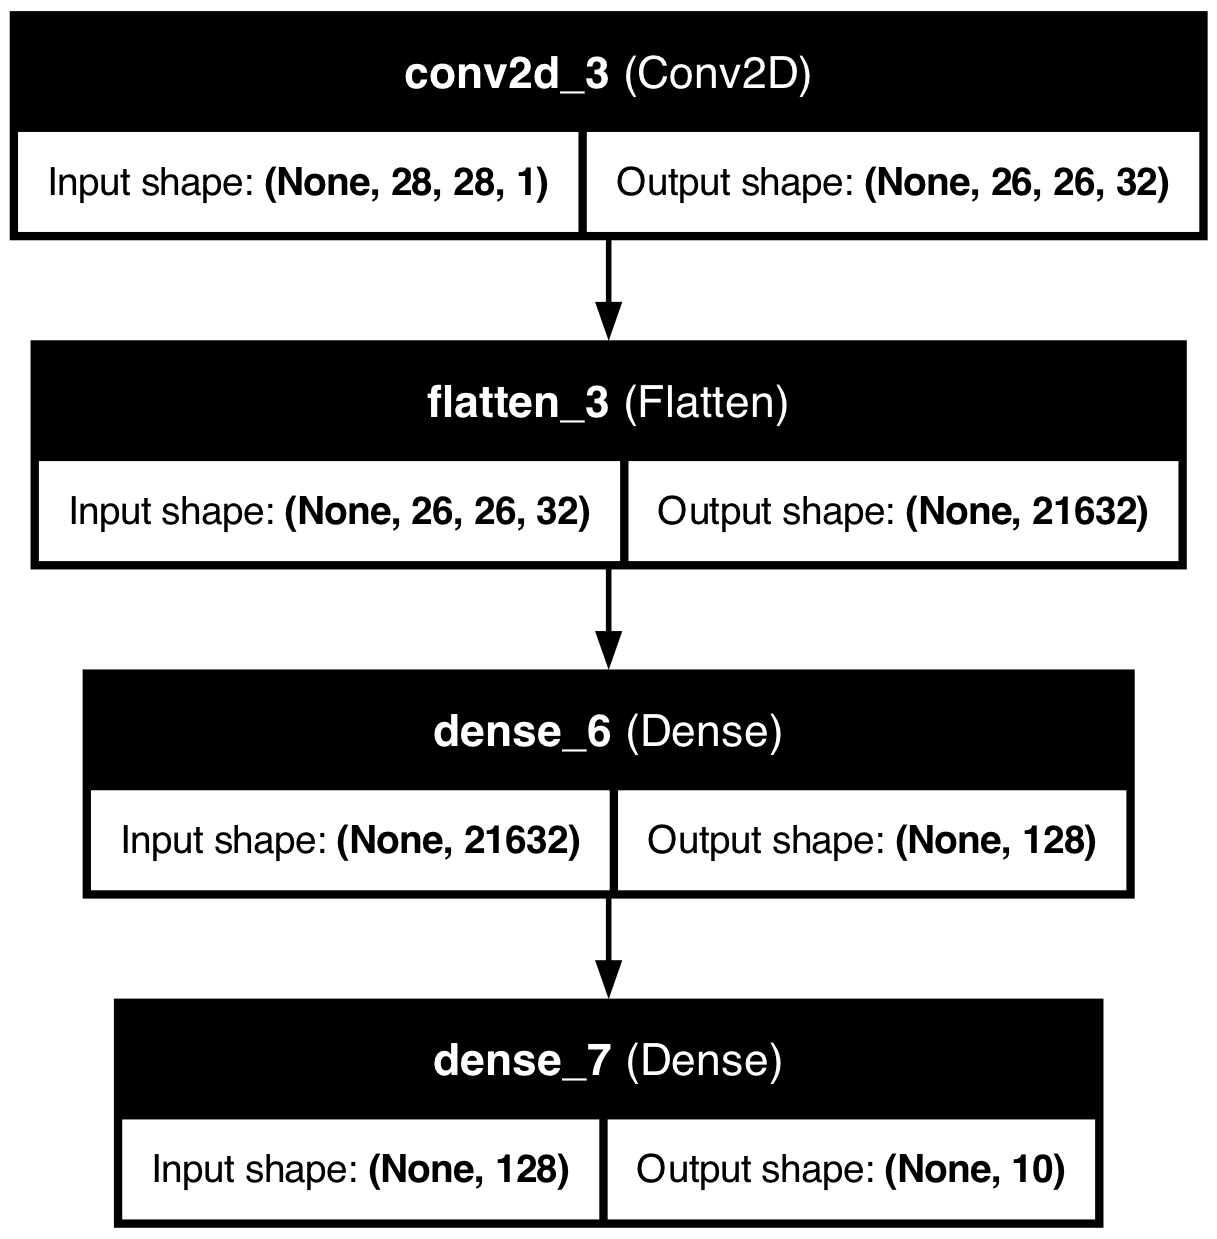

In [6]:

from keras.utils import plot_model
# Plot the model architecture
plot_model(model5, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [8]:
model5.save('fashion_mnist_model.h5')  # Save the model to a file

# 5. Training Final Model and Evaluation

In this section, you will train the final model using the best hyperparameters and regularization techniques you found in the previous section. You should:
- [ ] Compile the final model with the best hyperparameters and regularization techniques.
- [ ] Train the final model on the training set and evaluate it on the test set.
- [ ] Report the final model's performance on the test set, including accuracy and any other relevant metrics.

As found in the results of my controlled experiment shown below, the best combination of hyperparameters is "Batch Size: 16, Epochs: 5, Validation Accuracy: 0.9054", 
|Batch Size | Epochs| Validation Accuracy(%)|
|:---------:|:-----:|:---------------------:|
|16| 5 | 90.54|
|16| 10| 89.83|
|16| 15| 90.07|
| 32| 5| 90.07|
| 32| 10| 90.23|
| 32| 15| 89.79|
| 64| 5| 90.20|
| 64| 10| 89.99|
| 64| 15| 90.41|

<BR>Since the introduction of regularization reduced the accuracy from 90% to 88%, I will not be using it in my final model.

In [9]:
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D
# Load the Fashion MNIST dataset
# The Fashion MNIST dataset is a collection of 70,000 grayscale images of 10 different clothing items, each of size 28x28 pixels.
# The dataset is split into a training set of 60,000 images and a test set of 10,000 images.
(X_train_4, y_train_4), (X_test_4, y_test_4) = fashion_mnist.load_data()

# Normalize the pixel values to be between 0 and 1
X_train_4 = X_train_4.astype('float32') / 255.0
X_test_4 = X_test_4.astype('float32') / 255.0

# Classes in the Fashion MNIST dataset
class_names_4 = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Inspect the shapes of the datasets
print(f'X_train shape: {X_train_4.data.shape}')
print(f'y_train shape: {y_train_4.shape}')
print(f'X_test shape: {X_test_4.shape}')
print(f'y_test shape: {y_test_4.shape}')

# Convert labels to one-hot encoding
from keras.utils import to_categorical

print(f'Before one-hot encoding: {y_train_4[0]}')
y_train_4 = to_categorical(y_train_4, num_classes=10)
y_test_4 = to_categorical(y_test_4, num_classes=10)
print(f'After one-hot encoding: {y_train_4[0]}')

# Reshape the data to include the channel dimension
X_train_4 = X_train_4.reshape(-1, 28, 28, 1)
X_test_4 = X_test_4.reshape(-1, 28, 28, 1)

# Create a simple CNN model
model4 = Sequential()
# Input layer
model4.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1))) # 32 filters, 3x3 kernel, ReLU activation
model4.add(Flatten()) # Flatten the output
model4.add(Dense(64, activation='relu')) # 64 neurons, ReLU activation
# Output layer
model4.add(Dense(10, activation='softmax')) # 10 neurons, softmax activation    

# Train the model
model4.compile(
    loss='categorical_crossentropy', # Loss function
    optimizer='sgd', # Optimizer
    metrics=['accuracy'] # Metrics to evaluate the model
)
model4.fit(
    X_train_4, # Training data
    y_train_4, # Training labels
    epochs=5, # Number of epochs
    batch_size=16, # Number of samples per batch
    validation_split=0.2 # Use 20% of the data for validation
)

# Evaluate the model
loss4, accuracy4 = model4.evaluate(X_test_4, y_test_4)
print(f'Loss:     {loss4:.2f}')
print(f'Accuracy: {accuracy4*100:.2f}%')

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)
Before one-hot encoding: 9
After one-hot encoding: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Epoch 1/5
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7205 - loss: 0.8009 - val_accuracy: 0.8292 - val_loss: 0.4843
Epoch 2/5
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8386 - loss: 0.4480 - val_accuracy: 0.8525 - val_loss: 0.4097
Epoch 3/5
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8594 - loss: 0.3926 - val_accuracy: 0.8692 - val_loss: 0.3705
Epoch 4/5
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8708 - loss: 0.3631 - val_accuracy: 0.8712 - val_loss: 0.3560
Epoch 5/5
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8831 - loss: 0.3266 - val_accuracy: 0.8827 - val_loss: 0.3263
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8753 - loss: 0.3449
Loss:     0.35
Accuracy: 87.49%


Reflection: How does the final model's performance compare to the baseline and the CNN model? What do you think contributed to the final model's performance? If you had time, what other experiments would you run to further improve the model's performance?

**Your answer here**
<BR> The final model's performance had inceased. The training accuracy had reached 95%, but due to the randomness of representing the samples into the model, the test accuracy and loss were 90.09% & 0.32 respectively.
<BR> Even though I experimented with some, I would be changing the filters, adding additional hidden layers, and changing the batch size, kernel and epoch parameters.
<br> I changed the optimizer from adam to sgd, and the accuracy improved form 90% - 87% but the loss parameter almost remained the same from 0.32 - 0.35.
<br>
|Optimizer|training accuracy(%)| training loss| validation accuracy(%)| validation loss| testing accuracy(%)| testing loss|overall accuracy| overall loss|
|:-----:|:-----------------:|:------------:|:-------------------:|:-------------:|:---------------:|:-----------:|:----:|:----:|
|ADAM(last Epoch)|95.38|0.1233|90.44|0.3082|89.96|0.3373|90.09|0.32|
|SGD(Last Epoch)|88.31|0.3266|88.27|0.3263|87.53|0.3449|87.49|0.35|

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.
### Submission Parameters:
* Submission Due Date: `23:59 PM - 06/07/2025`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb)
    * The Lab 1 notebook (labs/lab_1.ipynb)
    * The Lab 2 notebook (labs/lab_2.ipynb)
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
* Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.
Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.
If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-6-ml-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.